## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.1, l2_ratio=0.1):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.9
L1_EXP = [1e-2, 1e-4, 1e-6]
L2_EXP = [1e-2, 1e-4, 1e-6]

In [7]:
import itertools

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with L1 = 0.001000, L2 = 0.001000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions fo

50000/50000 [==============================] - 2s 41us/step - loss: 2.0991 - acc: 0.3836 - val_loss: 2.0899 - val_acc: 0.3892
Epoch 49/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.0822 - acc: 0.3845 - val_loss: 2.0825 - val_acc: 0.3860
Epoch 50/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.0668 - acc: 0.3860 - val_loss: 2.0580 - val_acc: 0.3899
Experiment with L1 = 0.001000, L2 = 0.000010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)    

50000/50000 [==============================] - 2s 40us/step - loss: 2.1148 - acc: 0.3999 - val_loss: 2.1072 - val_acc: 0.3988
Experiment with L1 = 0.000010, L2 = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.5268 - acc: 0.2458 - val_loss: 2.3771 - val_acc: 0.3084
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.3168 - acc: 0.3323 - val_loss: 2.2653 - val_acc: 0.3474
Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.2334 - acc: 0.3622 - val_loss: 2.2161 - val_acc: 0.3582
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1818 - acc: 0.3813 - val_loss: 2.1616 - val_acc: 0.3896
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1425 - acc: 0.3952 - val_loss: 2.1238 - val_acc: 0.4009
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1092 - acc: 0.4070 - val_loss: 2.1013 - val_acc: 0.4076
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.0798 - acc: 0.4203 - val_loss: 2.0848 - val_acc

50000/50000 [==============================] - 2s 40us/step - loss: 3.1746 - acc: 0.3695 - val_loss: 3.1400 - val_acc: 0.3837
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 3.1148 - acc: 0.3883 - val_loss: 3.0907 - val_acc: 0.3933
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 3.0684 - acc: 0.4018 - val_loss: 3.0505 - val_acc: 0.4004
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 3.0284 - acc: 0.4128 - val_loss: 3.0107 - val_acc: 0.4156
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.9930 - acc: 0.4213 - val_loss: 2.9771 - val_acc: 0.4260
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.9584 - acc: 0.4316 - val_loss: 2.9461 - val_acc: 0.4334
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.9270 - acc: 0.4396 - val_loss: 2.9237 - val_acc: 0.4299
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 41us/step - loss: 1.7194 - acc: 0.4014 - val_loss: 1.7055 - val_acc: 0.4153
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6858 - acc: 0.4140 - val_loss: 1.6742 - val_acc: 0.4147
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6562 - acc: 0.4231 - val_loss: 1.6501 - val_acc: 0.4221
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6294 - acc: 0.4308 - val_loss: 1.6253 - val_acc: 0.4287
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6055 - acc: 0.4398 - val_loss: 1.6035 - val_acc: 0.4404
Epoch 10/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5840 - acc: 0.4486 - val_loss: 1.5913 - val_acc: 0.4445
Epoch 11/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.5642 - acc: 0.4533 - val_loss: 1.5716 - val_acc: 0.4520
Epoch 12/50
50000/50000 [=========================

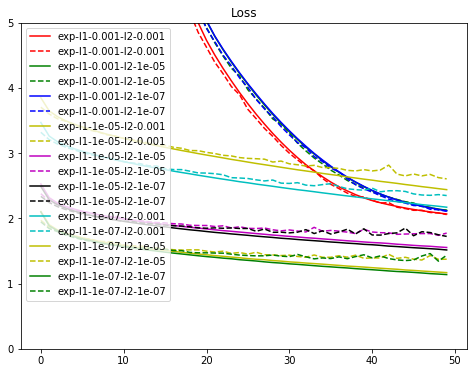

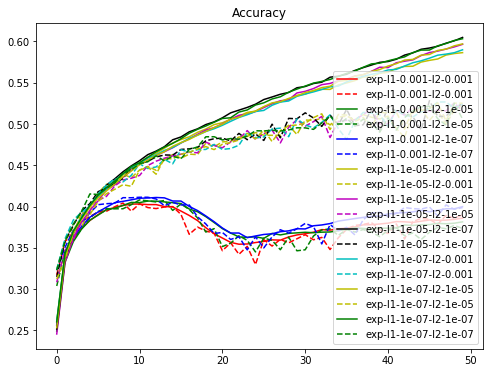

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "c", "y", "g"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()